# Conjugate Gradient Method

In [67]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as pt

Let's make up a random linear system with an SPD $A$:

In [73]:
np.random.seed(25)
n = 2
Q = la.qr(np.random.randn(n, n))[0]
A = Q @ (np.diag(np.random.rand(n)) @ Q.T)

b = np.random.randn(n)

Here's the objective function for CG:

In [74]:
def phi(xvec):
    x, y = xvec
    return 0.5*(A[0,0]*x*x + 2*A[1,0]*x*y +  A[1,1]*y*y) - x*b[0] - y*b[1]

def dphi(xvec):
    x, y = xvec
    return np.array([
            A[0,0]*x + A[0,1]*y - b[0],
            A[1,0]*x + A[1,1]*y - b[1]
        ])

Here's the function $\phi$ as a "contour plot":

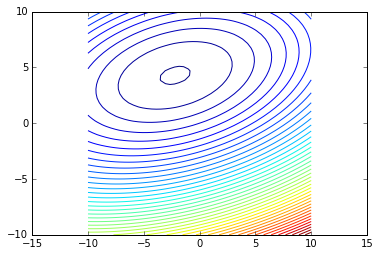

In [75]:
xmesh, ymesh = np.mgrid[-10:10:50j,-10:10:50j]
phimesh = phi(np.array([xmesh, ymesh]))
pt.axis("equal")
pt.contour(xmesh, ymesh, phimesh, 50)

## Running Conjugate Gradients ("CG")

Initialize the method:

In [76]:
x0 = np.array([2, 2./5])
#x0 = np.array([2, 1])

iterates = [x0]
gradients = [dphi(x0)]
directions = [-dphi(x0)]

Evaluate this cell many times in-place:

-4.61671051783


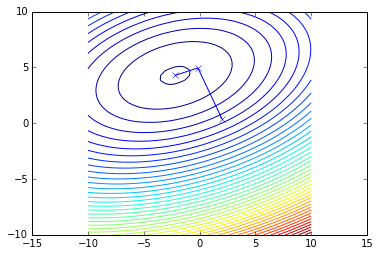

In [78]:
x = iterates[-1]
s = directions[-1]

def f1d(alpha):
    return phi(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_x = x + alpha_opt*s

g = dphi(next_x)
last_g = gradients[-1]
gradients.append(g)

beta = np.dot(g, g)/np.dot(last_g, last_g)
directions.append(-g + beta*directions[-1])

print(phi(next_x))

iterates.append(next_x)

# plot function and iterates
pt.axis("equal")
pt.contour(xmesh, ymesh, phimesh, 50)
it_array = np.array(iterates)
pt.plot(it_array.T[0], it_array.T[1], "x-")